In [3]:
import os
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch
from pathlib import Path
import gc
from PIL import Image
from matplotlib import pyplot as plt
import time

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!


In [4]:

base_data_dir = Path("/data")


In [5]:
!rm -fr unsloth_compiled_cache

In [6]:
model_mapper = {
  
      "Qwen2_5-3b_finetuned":str(base_data_dir / "models/qwen2_5_3b_outputs"),
      "Qwen2_5-7b_finetuned":str(base_data_dir / "models/qwen2_5_7b_outputs"),
      
      "Qwen2-vl-7b_finetuned":str(base_data_dir / "models/qwen2_VL_7b/lora_model"),
      "Qwen2_5-3b":"unsloth/Qwen2.5-VL-3B-Instruct",
      "Qwen2_5-7b":"unsloth/Qwen2.5-VL-7B-Instruct",
      "Qwen2-vl-7b":"unsloth/Qwen2-VL-7B-Instruct"   
}

In [7]:
SYSTEM_PROMPT = '''
Вы — ассистент OCR , который извлекает информацию с русских товарных этикеток на изображениях. В тексте могут встречаться названия на английском.
'''

USER_PROMPT = '''
Пожалуйста, извлеките весь текст на изображении и ничего больше без комментариев. 
'''

In [8]:
from qwen_processor import QwenProcessor
 

In [9]:
!pip show torch

Name: torch
Version: 2.7.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, bitsandbytes, cut-cross-entropy, peft, torchaudio, torchvision, unsloth, unsloth_zoo, xformers


In [10]:
!pip show unsloth

Name: unsloth
Version: 2025.4.7
Summary: 2-5X faster LLM finetuning
Home-page: http://www.unsloth.ai
Author: Unsloth AI team
Author-email: info@unsloth.ai
License-Expression: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: accelerate, bitsandbytes, datasets, diffusers, hf_transfer, huggingface_hub, numpy, packaging, peft, protobuf, psutil, sentencepiece, torch, torchvision, tqdm, transformers, triton, trl, tyro, unsloth_zoo, wheel, xformers
Required-by: 


In [11]:
qwen_processor = QwenProcessor()

In [12]:
qwen_processor.get_available_models()

dict_keys(['Qwen2_5-3b_finetuned', 'Qwen2_5-7b_finetuned', 'Qwen2-vl-7b_finetuned', 'Qwen2_5-3b', 'Qwen2_5-7b', 'Qwen2-vl-7b'])

In [13]:
img = Image.open(base_data_dir / "names" / "1.jpg")

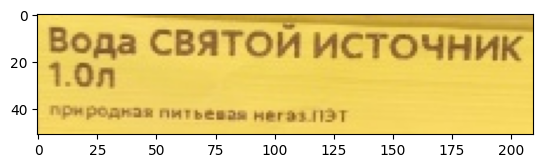

In [14]:
plt.imshow(img)

In [15]:
model_name = "Qwen2_5-7b"


In [16]:
result_txt = qwen_processor.process(SYSTEM_PROMPT, USER_PROMPT, img, model_name )
print(result_txt)

==((====))==  Unsloth 2025.4.7: Fast Qwen2 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA RTX A5000. Num GPUs = 1. Max memory: 23.679 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 8.6. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Вода святой источник 1.0л
природная питьевая негаз.ПЭТ
